### Machine learning is the process of extracting knowledge from data automatically, usually with the goal of making predictions on new, unseen data.

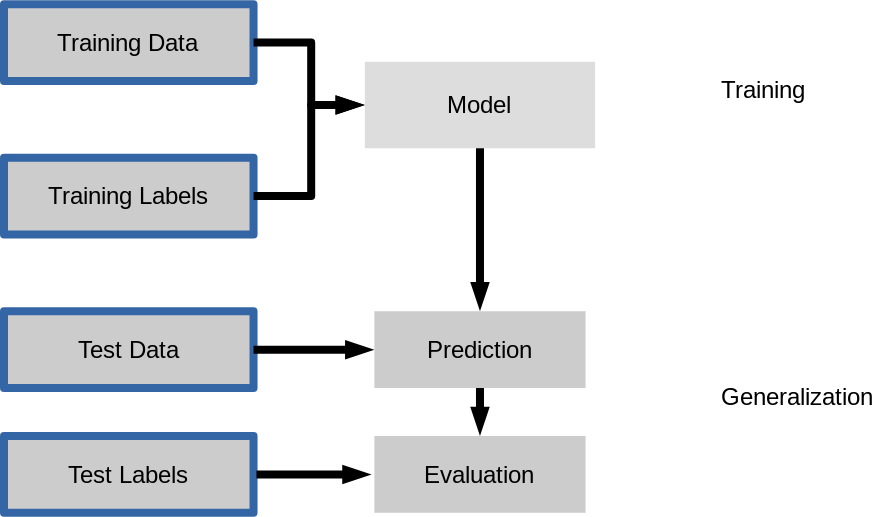

Machine Learning can be divided into 4 parts:
* Supervised Learning
* Unsupervised Learning
* Deep Learning
* Reinforcement Learning

In **Supervised Learning**, we have a dataset consisting of both input data and a desired output. The task is to construct a model (or program) which is able to predict the desired output of an unseen object given the set of features. It can also be divided into 2 parts:
    * Regression: Continous Data
        - Predict house prices
        - Predict persons salary
        
    * Classification: Discrete Data
        - Email Spam / Not Spam
        - Given an image of digit, predict which digit it is
        - Given an image of person, predict if he is male or female

### Tools used
* **Scikit Learn** : For implementing machine learning models
* **Numpy and Pandas** : For filtering and preparing the data
* **Matplotlib** : To visualize the data

## Linear Regression:

In [ ]:
## use lecture slides to explain

In [1]:
from sklearn.datasets import load_boston, make_blobs, load_iris
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plot_2d_separator import plot_2d_separator

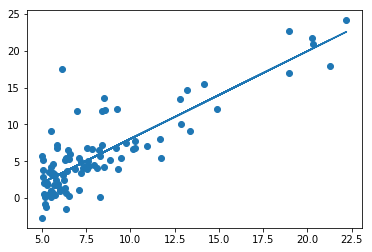

0.42078669344216285

In [6]:
# loading the data, here we predict the body size of a persosn given the size of his brain
dataset = pd.read_csv('challenge_dataset.txt')
x = dataset[['Brain']]
y = dataset[['Body']]
#define the model using sklearn and training it using fit() method
model = linear_model.LinearRegression()
model.fit(x,y)
# plot the data and model using matplotlib and predicted values using predict() method
plt.scatter(x,y)
plt.plot(x, model.predict(x))
plt.show()
# evaluate the performance using score()
model.score(model.predict(x), y)

In [3]:
# linear regression is so simple it can be implemented from scratch
# this function computes the cost
def compute_error(m, b, x, y):
    predictions = (m*x)+b
    error = ((predictions-y)**2).sum()/float(100)
    return error
# this function is used to run the Gradient Descent Algorithm
def gradient_descent(learning_rate, b, m, x, y):
    prediction = m*x + b
    # b is theta0 and m is theta1
    b = b - ((learning_rate/100)*(prediction-y).sum())
    m = m - ((learning_rate/100)*((prediction-y)*x).sum())
    return m,b
# main driver function
def driver(x,y):
    learning_rate = 0.00001
    iterations = 10000
    # y = mx+b
    initial_b = 0
    initial_m = 0
    errors = []
    m_arr = []
    m,b = gradient_descent(learning_rate, initial_b, initial_m, x, y)
    for i in range(iterations):
        errors.append(compute_error(m,b,x,y))
        m_arr.append(m)
        m,b = gradient_descent(learning_rate, b, m, x, y)
    return errors,m_arr,m,b

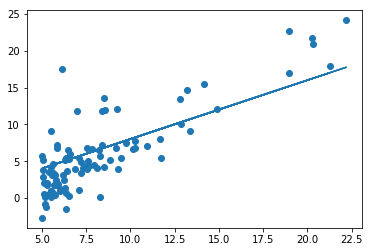

In [7]:
# loading the data
dataset = pd.read_csv('challenge_dataset.txt')
x = dataset[['Brain']].values
y = dataset[['Body']].values
# calling the driver function which returns errors, m_arr: array of slopes, m: optimal slope, b: optimal y-axis intercept
errors,m_arr,m,b = driver(x,y)
# plotting the data and model
plt.scatter(x,y)
plt.plot(x, (m*x)+b)
plt.show()

In [5]:
# multivariable linear regression
# loading the dataset
dataset = load_boston()
x = dataset.data
y = dataset.target
print(x.shape, y.shape)
# spliting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=3)
# training and evaluating the model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
model.score(x_test, y_test)

(506, 13) (506,)


0.766723551207672

## Logistic Regression

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)


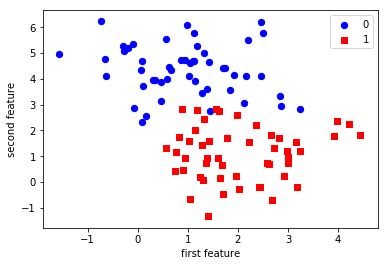

In [61]:
# making the data for training
X, y = make_blobs(centers=2, random_state=0)
print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

0.84


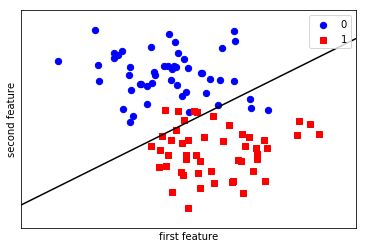

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234, stratify=y)
# training and evaluating the model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(model, X)
plt.legend(loc='upper right')

## K Nearest Neighbours (KNN)

1.0


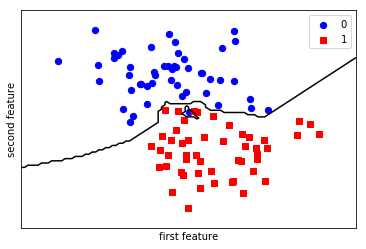

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(knn.score(X_test,y_test))
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');

**Task**: Train Logistic Regression and KNN model on Iris Dataset (present in sklearn, use `load_iris()` to load dataset)

**Unsupervised Learning (Clustering)** is the task of gathering samples into groups of similar samples according to some predefined similarity. In this the dataset does not include y(outcome) i.e. the dataset is unlabled. Examples include:

* Compression for data reduction
* Grouping related web news (e.g. Google News) and web search results
* Grouping related stock quotes for investment

## K-Means Clustering

(100, 2)


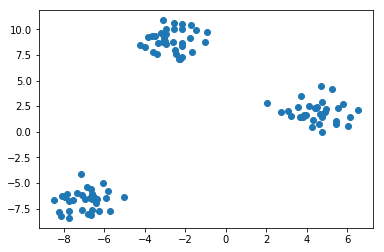

In [85]:
# making up the data
X, y = make_blobs(random_state=42)
print(X.shape)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

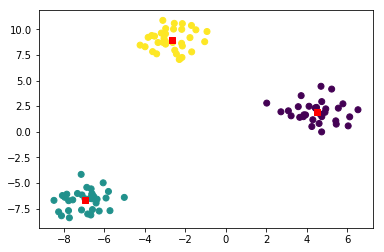

In [83]:
# defining the model
kmeans = KMeans(n_clusters=3, random_state=42)
# training the model
kmeans.fit(X)
labels = kmeans.predict(X)
# plotting the outcome and center of each cluster
plt.scatter(X[:, 0], X[:, 1], c=labels)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], color='red', marker='s')

Q: How to find number of clusters?

Ans: Elbow Method

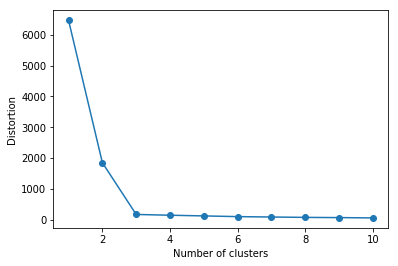

In [87]:
errors = []
# finding errors for n=1 to 10 clusters
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(X)
    errors.append(km.inertia_)
# plotting all errors
plt.plot(range(1, 11), errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In the above figure there is an elbow at n=3, hence the number of clusters

**Task:** Use the K-Means clustering on the digits dataset (present in sklearn, use `load_digits()` to load dataset)

In [93]:
# Run the cell below to load the solution
# %load digits_clustering.py